# Demo

## Inicialiación

In [7]:
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np
from matplotlib import animation, rc
from matplotlib import style

# Jupyter Specifics
import matplotlib as mpl
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

plt.style.use('bmh')

%matplotlib inline

mpl.rcParams['figure.figsize'] = (16.0, 6.0)
rc('animation', html='html5')

## Analisis 1

In [8]:
def f(a, b, c):
    x = np.linspace(-5,5,100)
    y = a*x**2+b*x+c
    plt.title("Expresion: $ax^2 + bx + c$ \n a = {}, b = {}, c = {}".format(a,b,c))
    plt.ylim(-1,20)
    plt.xlim(-5,5)
    plt.grid(color='grey', linewidth=0.5)
    plt.plot(x, y)

interact(f, 
         a=FloatSlider(min=-5, max=6, step=0.25, value=1, layout=Layout(width='99%')), 
         b=FloatSlider(min=-5, max=6, step=1, value=0, layout=Layout(width='99%')),
         c=FloatSlider(min=-5, max=6, step=1, value=1, layout=Layout(width='99%')),);

interactive(children=(FloatSlider(value=1.0, description='a', layout=Layout(width='99%'), max=6.0, min=-5.0, step=0.25), FloatSlider(value=0.0, description='b', layout=Layout(width='99%'), max=6.0, min=-5.0, step=1.0), FloatSlider(value=1.0, description='c', layout=Layout(width='99%'), max=6.0, min=-5.0, step=1.0), Output()), _dom_classes=('widget-interact',))

In [9]:
def f2(a, b, c):
    x = np.linspace(-5,5,1000)
    y = (a*x+b)**2+c
    plt.title("Expresion: $(ax+b)^2 + c$ \n a = {}, b = {}, c = {}".format(a,b,c))
    plt.ylim(-1,20)
    plt.xlim(-5,5)
    plt.grid(color='grey', linewidth=0.5)
    plt.plot(x, y)

interact(f2, 
         a=FloatSlider(min=-5, max=6, step=0.25, value=1, layout=Layout(width='99%')), 
         b=FloatSlider(min=-5, max=6, step=1, value=0, layout=Layout(width='99%')),
         c=FloatSlider(min=-5, max=6, step=1, value=1, layout=Layout(width='99%')),);

interactive(children=(FloatSlider(value=1.0, description='a', layout=Layout(width='99%'), max=6.0, min=-5.0, step=0.25), FloatSlider(value=0.0, description='b', layout=Layout(width='99%'), max=6.0, min=-5.0, step=1.0), FloatSlider(value=1.0, description='c', layout=Layout(width='99%'), max=6.0, min=-5.0, step=1.0), Output()), _dom_classes=('widget-interact',))

In [11]:
from matplotlib.patches import Polygon
import scipy.integrate as integrate


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


def f3(a, b):
    x = np.linspace(0, 10)
    y = func(x)

    fig, ax = plt.subplots()
    plt.plot(x, y, linewidth=2)
    plt.ylim(ymin=0)

    # Make the shaded region
    ix = np.linspace(a, b)
    iy = func(ix)
    verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    ax.add_patch(poly)

    plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
             horizontalalignment='center', fontsize=20)

    ax.set_xticks((a, b))
    ax.set_xticklabels(('$a$', '$b$'))

    inte = int(integrate.quad(func, a, b)[0])
    plt.title("Expressión: $(x - 3)(x - 5)(x - 7) + 85$ " + "--- $a = {}, b= {}$ ---".format(a, b) +
              " $\int_a^b f(x)\mathrm{d}x" + " = {0}$".format(inte))
    plt.show()

interact(f3, 
         a=FloatSlider(min=-5, max=10, step=0.25, value=2, layout=Layout(width='99%')), 
         b=FloatSlider(min=-5, max=10, step=0.25, value=9, layout=Layout(width='99%')));

interactive(children=(FloatSlider(value=2.0, description='a', layout=Layout(width='99%'), max=10.0, min=-5.0, step=0.25), FloatSlider(value=9.0, description='b', layout=Layout(width='99%'), max=10.0, min=-5.0, step=0.25), Output()), _dom_classes=('widget-interact',))

## Estadística

In [13]:
import sympy as sy
import numpy as np
from sympy.functions import sin,cos
import matplotlib.pyplot as plt

# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

# Taylor approximation at x0 of the function 'function'
def taylor(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i
        i += 1
    return p

1 Taylor expansion at n=1 0
3 Taylor expansion at n=3 x**3
5 Taylor expansion at n=5 -x**5/6 + x**3
7 Taylor expansion at n=7 x**7/120 - x**5/6 + x**3
9 Taylor expansion at n=9 -x**9/5040 + x**7/120 - x**5/6 + x**3


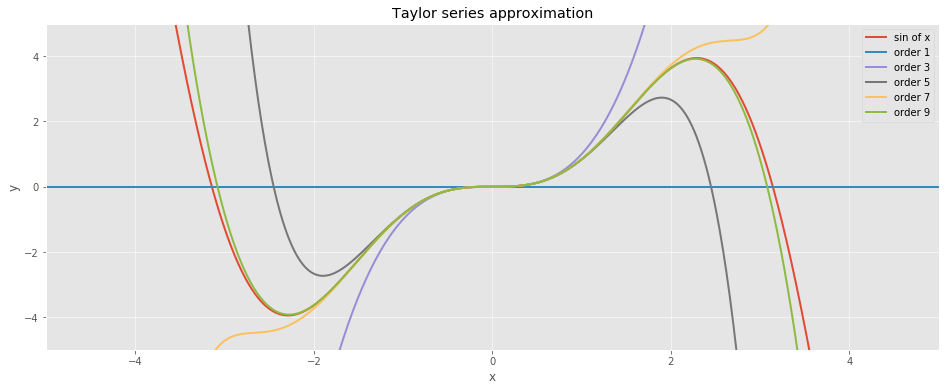

In [19]:
x = sy.Symbol('x')
f = sin(x) * x**2

def animate(j):
    if j % 2 == 0:
        return []
    
    x_lims = [-5,5]
    x1 = np.linspace(x_lims[0],x_lims[1],800)
    if j == 1:
        plt.plot(x1,np.sin(x1) * x1**2,label='sin of x')
    y1 = []
    func = taylor(f,0,j)
    print(j, 'Taylor expansion at n='+str(j),func)
    for k in x1:
        y1.append(func.subs(x,k))
    plt.plot(x1,y1,label='order '+str(j))

    plt.xlim(x_lims)
    plt.ylim([-5,5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation')
    return []

# Plot results
def plot():
    fig, ax = plt.subplots();  
    anim = animation.FuncAnimation(fig, animate, frames=10, interval=500, blit=True);
    return anim


anim = plot()
HTML(anim.to_html5_video())

In [25]:
x = sy.Symbol('x')
f = sin(x)

def f4(order):  
    x_lims = [-10, 10]
    x1 = np.linspace(x_lims[0],x_lims[1],800)
    plt.plot(x1,np.sin(x1),label='sin of x')
    y1 = []
    func = taylor(f,0,order)
    for k in x1:
        y1.append(func.subs(x,k))
    plt.plot(x1,y1,label='order '+str(order))
    plt.xlim(x_lims)
    plt.ylim([-5,5])
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation')
    plt.show()

interact(f4, 
         order=IntSlider(min=1, max=15, step=2, value=1, layout=Layout(width='99%')),);

interactive(children=(IntSlider(value=1, description='order', layout=Layout(width='99%'), max=15, min=1, step=2), Output()), _dom_classes=('widget-interact',))